# Currencies Trend Following Portfolio

    1. The Security closes with 50/100 ma > 0, buy.
    2. If the Security closes 50/100 ma < 0, sell your long position.
    
    (For a Portfolio of currencies.)
    
    NOTE: pinkfish does not yet have full support for currencies backtesting, and
    the currency data from yahoo finance isn't very good.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### MICRO FUTURES

In [3]:
# symbol: (description, multiplier)


currencies = {
#     'BTCUSD=X': 'Bitcoin USD Futures', 1),
#     'ETHUSD=X': 'Ethereum USD 
    'EURUSD=X': 'EUR/USD Futures',
    'JPY=X':    'USD/JPY Futures',
    'GBPUSD=X': 'GBP/USD Futures',
    'AUDUSD=X': 'AUD/USD Futures',
    'NZDUSD=X': 'NZD/USD Futures',
    'EURJPY=X': 'EUR/JPY Futures',
    'GBPJPY=X': 'GBP/JPY Futures',
    'EURGBP=X': 'EUR/GBP Futures',
    'EURCAD=X': 'EUR/CAD Futures',
    'EURSEK=X': 'EUR/SEK Futures',
    'EURCHF=X': 'EUR/CHF Futures',
    'EURHUF=X': 'EUR/HUF Futures',
    'EURJPY=X': 'EUR/JPY Futures',
    'CNY=X':    'USD/CNY Futures',
    'HKD=X':    'USD/HKD Futures',
    'SGD=X':    'USD/SGD Futures',
    'INR=X':    'USD/INR Futures',
    'MXN=X':    'USD/MXN Futures',
    'PHP=X':    'USD/PHP Futures',
    'IDR=X':    'USD/IDR Futures',
    'THB=X':    'USD/THB Futures',
    'MYR=X':    'USD/MYR Futures',
    'ZAR=X':    'USD/ZAR Futures',
    'RUB=X':    'USD/RUB Futures'
}

symbols = list(currencies)
#symbols = ['EURUSD=X']
capital = 100_000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'force_stock_market_calendar' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1,
    'lookback' : 1,
    'sma_timeperiod': 20,
    'sma_pct_band': 0,
    'use_regime_filter' : True,
    'use_vola_weight' : False
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********




View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2007-03-02,0,11.13,390,entry,LONG,MXN=X
1,2007-03-02,1,1.32,3302,entry,LONG,EURUSD=X
2,2007-03-02,2,0.78,5544,entry,LONG,AUDUSD=X
3,2007-03-02,3,0.69,6309,entry,LONG,NZDUSD=X
4,2007-03-02,4,1.55,2808,entry,LONG,EURCAD=X


In [7]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2007-03-02,0.78,2007-03-05,0.77,-0.01,-79.97,5544,-79.97,LONG,AUDUSD=X
1,2007-03-02,0.69,2007-03-05,0.67,-0.02,-97.81,6309,-177.78,LONG,NZDUSD=X
2,2007-03-02,1.55,2007-03-09,1.54,-0.01,-25.55,2808,-203.33,LONG,EURCAD=X
3,2007-03-02,7.82,2007-03-09,7.81,-0.01,-5.00,555,-208.33,LONG,HKD=X
4,2007-03-02,11.13,2007-03-22,10.98,-0.15,-58.62,390,-266.94,LONG,MXN=X


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2022-12-23,100980.03,100980.03,100980.03,13294,69821.01,1.00,O
2022-12-27,100994.61,100994.61,100994.61,20000,69787.33,1.00,O
2022-12-28,101064.07,101064.07,101064.07,20255,65402.98,1.00,O
2022-12-29,101244.46,101244.46,101244.46,20255,65402.98,1.00,-
2022-12-30,101274.91,101274.91,101274.91,3639,96872.60,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                   2007-03-02
end                                                     2022-12-30
beginning_balance                                           100000
ending_balance                                           101274.91
total_net_profit                                           1274.91
gross_profit                                              76897.18
gross_loss                                               -75622.26
profit_factor                                                 1.02
return_on_initial_capital                                     1.27
annual_return_rate                                            0.08
trading_period                           15 years 9 months 28 days
pct_time_in_market                                           99.95
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
CNY=X,$838.67,0.04,0.66,15.13
PHP=X,-$463.41,0.04,-0.36,-8.36
JPY=X,-$235.23,0.04,-0.18,-4.24
INR=X,"$1,868.99",0.04,1.47,33.72
EURJPY=X,-$633.13,0.04,-0.50,-11.42
MXN=X,$616.76,0.04,0.48,11.13
EURUSD=X,-$496.81,0.04,-0.39,-8.96
AUDUSD=X,$396.95,0.04,0.31,7.16
RUB=X,"-$1,672.89",0.04,-1.31,-30.18
NZDUSD=X,"-$1,076.94",0.04,-0.84,-19.43


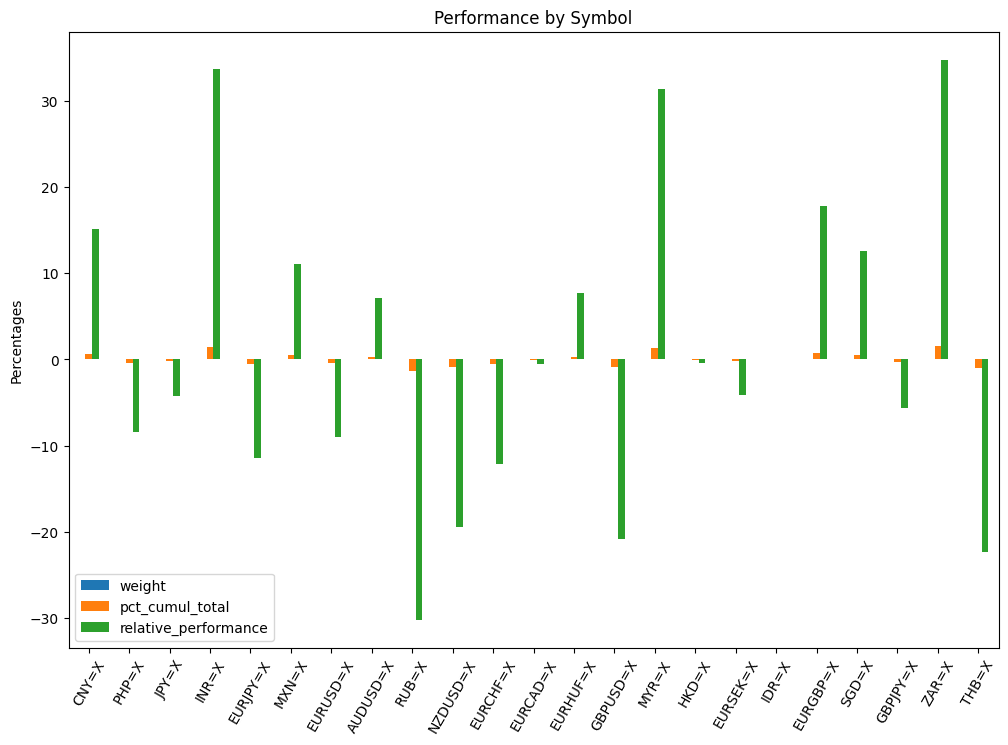

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,CNY=X,PHP=X,JPY=X,INR=X,EURJPY=X,MXN=X,EURUSD=X,AUDUSD=X,RUB=X,NZDUSD=X,...,GBPUSD=X,MYR=X,HKD=X,EURSEK=X,IDR=X,EURGBP=X,SGD=X,GBPJPY=X,ZAR=X,THB=X
CNY=X,1.00,0.14,0.05,0.10,-0.05,0.06,-0.11,-0.13,0.04,-0.14,...,-0.14,0.06,0.06,0.08,0.03,0.01,0.19,-0.06,0.13,0.09
PHP=X,0.14,1.00,0.00,0.25,-0.12,0.08,-0.16,-0.21,0.03,-0.19,...,-0.17,0.11,0.09,0.08,0.02,-0.00,0.28,-0.10,0.18,0.18
JPY=X,0.05,0.00,1.00,-0.02,0.54,-0.14,0.14,0.02,-0.00,-0.02,...,-0.06,0.03,0.01,-0.14,0.02,-0.11,0.14,0.56,-0.07,0.04
INR=X,0.10,0.25,-0.02,1.00,-0.23,0.14,-0.19,-0.33,0.03,-0.30,...,-0.24,0.10,0.09,0.15,0.01,0.02,0.36,-0.22,0.32,0.17
EURJPY=X,-0.05,-0.12,0.54,-0.23,1.00,-0.23,0.49,0.48,-0.01,0.44,...,0.40,-0.14,-0.06,-0.16,-0.01,0.17,-0.37,0.78,-0.41,-0.16
MXN=X,0.06,0.08,-0.14,0.14,-0.23,1.00,-0.20,-0.32,0.02,-0.30,...,-0.24,0.25,0.02,0.21,0.02,0.08,0.25,-0.26,0.37,0.07
EURUSD=X,-0.11,-0.16,0.14,-0.19,0.49,-0.20,1.00,0.46,-0.01,0.47,...,0.50,-0.16,-0.10,-0.10,-0.03,0.28,-0.56,0.24,-0.37,-0.21
AUDUSD=X,-0.13,-0.21,0.02,-0.33,0.48,-0.32,0.46,1.00,-0.04,0.84,...,0.57,-0.22,-0.11,-0.33,-0.03,-0.00,-0.70,0.44,-0.63,-0.21
RUB=X,0.04,0.03,-0.00,0.03,-0.01,0.02,-0.01,-0.04,1.00,-0.02,...,-0.02,-0.02,0.01,0.01,0.00,0.02,0.05,-0.02,0.04,0.02
NZDUSD=X,-0.14,-0.19,-0.02,-0.30,0.44,-0.30,0.47,0.84,-0.02,1.00,...,0.55,-0.21,-0.11,-0.30,-0.04,0.01,-0.69,0.39,-0.59,-0.22


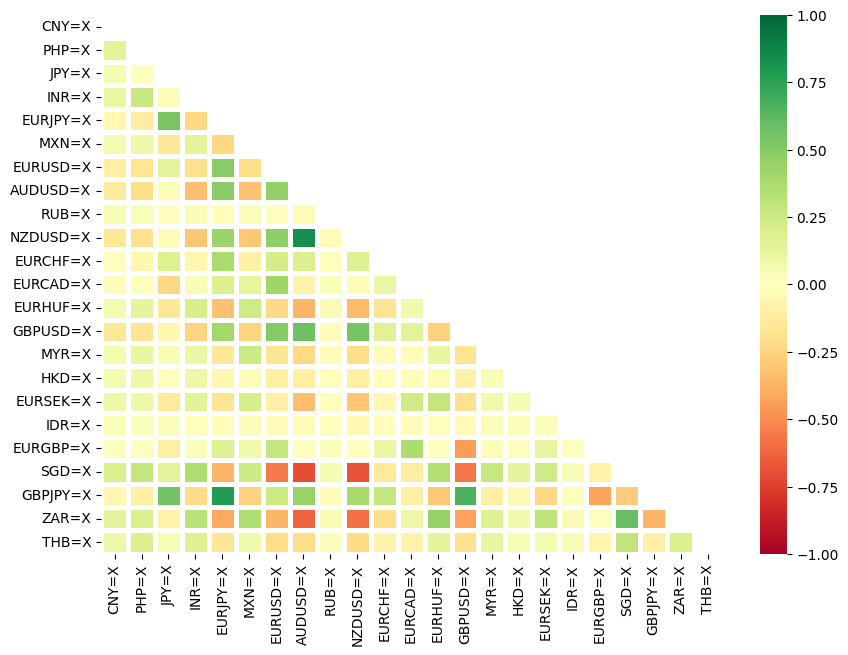

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

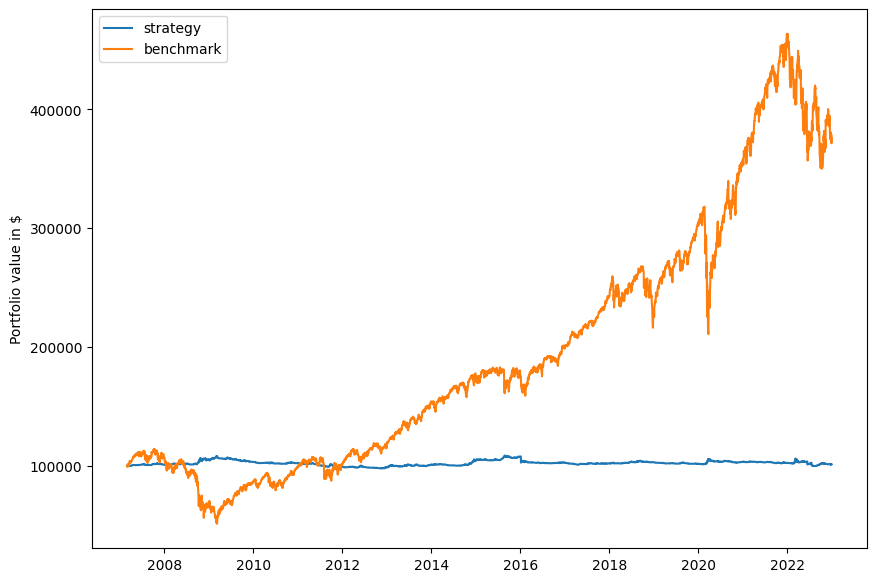

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,0.08,8.77
max_closed_out_drawdown,-9.57,-55.16
annualized_return_over_max_drawdown,0.01,0.16
best_month,4.81,23.61
worst_month,-4.47,-30.98
sharpe_ratio,0.04,0.51
sortino_ratio,0.05,0.62
monthly_std,0.73,4.84
annual_std,2.44,17.57


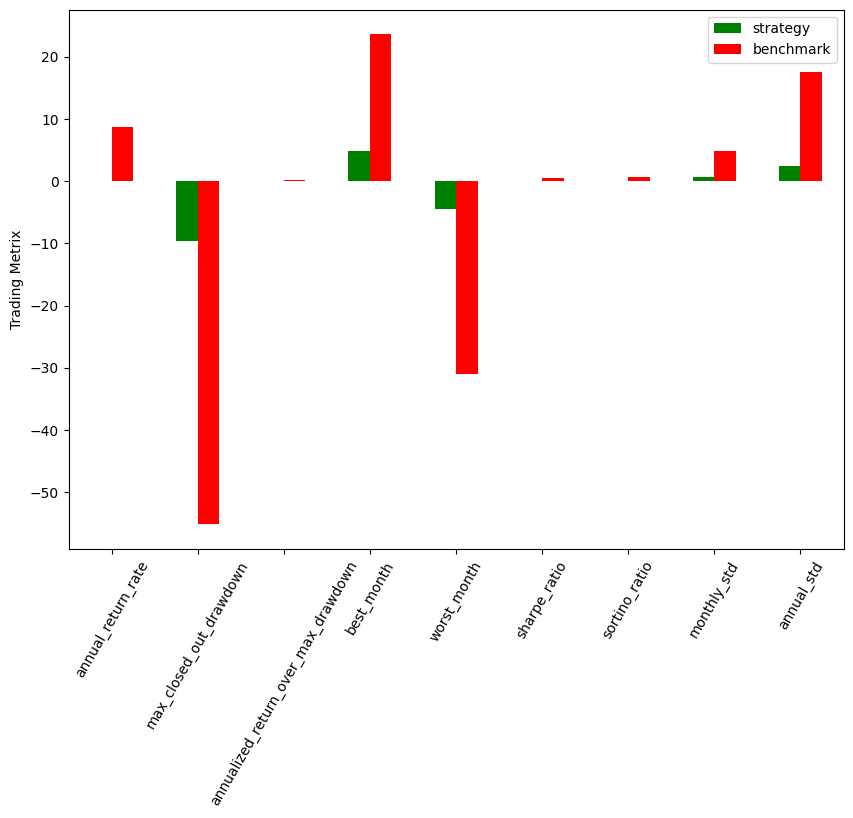

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio             0.04
sharpe_ratio_max         0.09
sharpe_ratio_min        -0.00
strategy risk            0.02
instrument risk          0.18
optimal target risk      0.04
half kelly criterion     0.02
aggressive leverage      0.25
moderate leverage        0.12
conservative leverage   -0.01
dtype: float64